## A Toy Example

Pretend we are studying the motion of the physicist’s ideal spring. 

This system consists of a ball of mass $m$ attached to a massless, frictionless spring. 

The ball is released a small distance away from equilibrium (i.e. the spring is stretched). 

Because the spring is ideal, it oscillates indefinitely along the $x$-axis about its equilibrium at a set frequency.

![](https://ccrma.stanford.edu/~jos/Laplace/img60.png)

This simple example is a canonical problem in classical mechanics. 

This is a standard problem in physics in which the force on the mass along the $x$ direction is a function of position. 

$$F = -kx$$

where $x$ is the position and $k$ is a constant associated with the spring itself. 

We also know that the force on an object is 

$$F = ma$$

where $m$ is the mass of the object and $a$ is its acceleration.

Thus, 

$$F = -kx = ma$$


We can further connect these by noting that when the position, $x$, is a function of time, the velocity, $v$ is the first derivative of the position. 

The velocity is how the position is changing with respect to time. 

We annotate this as

$$v(t) = \frac{d}{dt}x = \dot{x}$$

The acceleration $a$ is the first derivative of the velocity and the second derivative of the position. It is how the velocity is changing with respect to time. 

We annotate this as


$$a(t) = \frac{d^2}{dt^2}x = \ddot{x}$$

Therefore,

$$-kx = m\ddot{x}$$

or

$$\ddot{x} +\frac{k}{m}x = 0$$

This is known as a **differential equation** and has the solution 

$$x(t) = x_o\cos (\omega t) + \frac{v_o}{\omega}\sin (\omega t)$$

where $\omega = \frac{k}{m}$.

### True Function

We use this equation to define a "true function". We imagine pulling the mass to the left and then letting it go. This is modeled by $x_0 = -2$, $v_0 = 0$. 

We have chosen an arbitrary $\omega=0.1$. Recall, that $\omega$ is a constant containing the mass of the weight and the constant of the spring. 

In [1]:
cd ..

/home/samoht25/uclax-data-science/09-PCA-tutorial


In [2]:
mkdir data

mkdir: cannot create directory ‘data’: File exists


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
x_0 = -2
v_0 = 0
omega = .1
true_function = lambda t: x_0*np.cos(omega*t) + v_0/omega*np.sin(omega*t)

In order to model this in time, we define an arbitrary time vector.

In [5]:
tt = np.linspace(1,151,150)
tt

array([   1.        ,    2.00671141,    3.01342282,    4.02013423,
          5.02684564,    6.03355705,    7.04026846,    8.04697987,
          9.05369128,   10.06040268,   11.06711409,   12.0738255 ,
         13.08053691,   14.08724832,   15.09395973,   16.10067114,
         17.10738255,   18.11409396,   19.12080537,   20.12751678,
         21.13422819,   22.1409396 ,   23.14765101,   24.15436242,
         25.16107383,   26.16778523,   27.17449664,   28.18120805,
         29.18791946,   30.19463087,   31.20134228,   32.20805369,
         33.2147651 ,   34.22147651,   35.22818792,   36.23489933,
         37.24161074,   38.24832215,   39.25503356,   40.26174497,
         41.26845638,   42.27516779,   43.28187919,   44.2885906 ,
         45.29530201,   46.30201342,   47.30872483,   48.31543624,
         49.32214765,   50.32885906,   51.33557047,   52.34228188,
         53.34899329,   54.3557047 ,   55.36241611,   56.36912752,
         57.37583893,   58.38255034,   59.38926174,   60.39597

#### What kind of object is `tt`? What is its dimension?

Then, motion in a vacuum would look as 

In [6]:
xx = true_function(tt)

Text(0,0.5,'time')

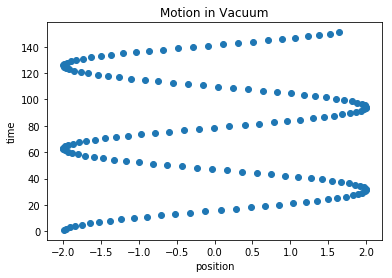

In [7]:
%matplotlib inline
plt.scatter(xx, tt)
plt.title('Motion in Vacuum')
plt.xlabel('position')
plt.ylabel('time')

### Environmental Noise

There would of course be some environmental noise. We model this using a simple noise function with a gaussian distribution.

In [20]:
env_noise = .2*np.random.rand(150)
env_noise

array([ 0.05736668,  0.16805444,  0.07625202,  0.12460416,  0.14345028,
        0.17099198,  0.07329756,  0.17449809,  0.12090666,  0.18691575,
        0.01217567,  0.19158957,  0.13812238,  0.11006632,  0.03943526,
        0.11310059,  0.14096754,  0.10036278,  0.05274319,  0.17450208,
        0.17123238,  0.08005719,  0.04653375,  0.12800927,  0.01565694,
        0.15236737,  0.05318329,  0.16660692,  0.15697715,  0.13419554,
        0.06834959,  0.04840104,  0.17362668,  0.14210676,  0.17909771,
        0.03099851,  0.18295454,  0.19444172,  0.14135255,  0.17323714,
        0.12511681,  0.0857974 ,  0.07447103,  0.09737365,  0.14314739,
        0.13576138,  0.17269876,  0.03936319,  0.04784794,  0.19879513,
        0.10413292,  0.14501493,  0.18974439,  0.04871679,  0.17216245,
        0.06509298,  0.03686225,  0.00761509,  0.08651966,  0.13314297,
        0.14533345,  0.01084186,  0.00917268,  0.0038932 ,  0.00191792,
        0.01903996,  0.05403701,  0.14410927,  0.05850072,  0.04

(array([ 14.,  14.,  16.,  15.,  10.,   8.,  18.,  19.,  23.,  13.]),
 array([ 0.00191792,  0.02160564,  0.04129336,  0.06098108,  0.0806688 ,
         0.10035652,  0.12004424,  0.13973197,  0.15941969,  0.17910741,
         0.19879513]),
 <a list of 10 Patch objects>)

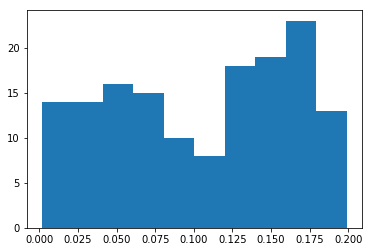

In [21]:
plt.hist(env_noise)

### Actual Motion

Then the actual motion would be the vacuum motion with the noise added.

In [22]:
xx_act = true_function(tt) + env_noise

Text(0,0.5,'time')

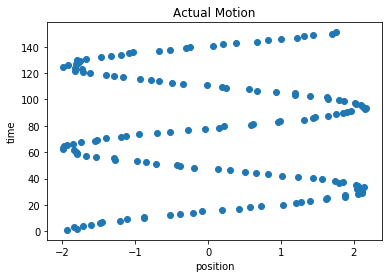

In [23]:
plt.scatter(xx_act, tt)
plt.title('Actual Motion')
plt.xlabel('position')
plt.ylabel('time')

### Modeling Experimental Data Collection

In the subsequent lesson, we will be modeling a situation in which we are measuing the above Actual Motion using three different cameras.

<img src="https://www.evernote.com/l/AAFyWbRBljJIqqUfNcOo8SvvvPa3gCnvCsAB/image.png" width="400px">

In order to simulate the positioning of the cameras, we will perform a rotation transformation on `xx_act`.

**Note**: we will make use of `np.pi` to convert from degrees to radians.

In [24]:
np.pi

3.141592653589793

In [25]:
deg_to_rad = lambda x: np.pi/180*x

def rotation(x, angle, rads=False):
    if not rads:
        angle = deg_to_rad(angle)
        
    xx = x*np.cos(angle)
    yy = x*np.sin(angle)
    return np.array([xx, yy]).T

In [26]:
cam_A = rotation(xx, 23)
cam_B = rotation(xx, -15)
cam_C = rotation(xx, 65)

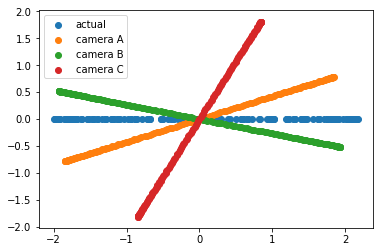

In [27]:
plt.scatter(xx_act, np.zeros_like(xx_act), label='actual')
plt.scatter(cam_A[:, 0], cam_A[:, 1], label='camera A')
plt.scatter(cam_B[:, 0], cam_B[:, 1], label='camera B')
plt.scatter(cam_C[:, 0], cam_C[:, 1], label='camera C')
plt.legend()

#### Each of the cameras is measuring the same thing from a different angle

## Instrument noise

Finally, we introduce some noise associated with the cameras ability to detect the position. 

In [28]:
noise_factor_A = .4
noise_factor_B = 1.1
noise_factor_C = .5

In [29]:
noise_A = noise_factor_A*np.random.rand(300).reshape(150,2)
noise_B = noise_factor_B*np.random.rand(300).reshape(150,2)
noise_C = noise_factor_C*np.random.rand(300).reshape(150,2)

In [30]:
cam_A_act = cam_A + noise_A
cam_B_act = cam_B + noise_B
cam_C_act = cam_C + noise_C

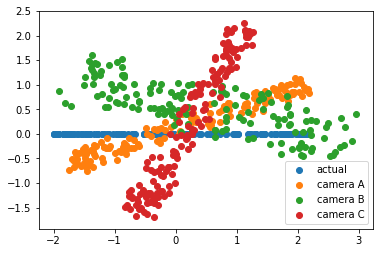

In [31]:
plt.scatter(xx_act, np.zeros_like(xx_act), label='actual')
plt.scatter(cam_A_act[:, 0], cam_A_act[:, 1], label='camera A')
plt.scatter(cam_B_act[:, 0], cam_B_act[:, 1], label='camera B')
plt.scatter(cam_C_act[:, 0], cam_C_act[:, 1], label='camera C')
plt.legend()

## Add Data to a dataframe and pickle

In [32]:
data_df = pd.DataFrame()
data_df['x_a'] = cam_A_act[:, 0]
data_df['x_b'] = cam_B_act[:, 0]
data_df['x_c'] = cam_C_act[:, 0]
data_df['y_a'] = cam_A_act[:, 1]
data_df['y_b'] = cam_B_act[:, 1]
data_df['y_c'] = cam_C_act[:, 1]
data_df

,x_a,x_b,x_c,y_a,y_b,y_c
0,-1.491938,-0.915467,-0.354727,-0.501428,0.988550,-1.363911
1,-1.587043,-0.966361,-0.746049,-0.395142,1.454184,-1.534402
2,-1.661025,-1.293376,-0.644113,-0.669801,0.777036,-1.663500
3,-1.361033,-1.061569,-0.772810,-0.666341,1.018386,-1.190254
4,-1.524391,-0.983870,-0.621450,-0.308760,0.654747,-1.383306
5,-1.496559,-1.373468,-0.602093,-0.584424,1.423196,-1.047216
6,-1.134644,-1.348598,-0.243642,-0.282730,1.004431,-1.156090
7,-1.111687,-1.330642,-0.109276,-0.292975,1.233572,-1.194423
8,-1.129415,-0.293980,-0.366309,-0.090975,0.411026,-0.960773
9,-0.809004,-0.079741,-0.106070,-0.337112,0.858661,-0.667024


In [22]:
data_df.to_pickle('data/ball_on_spring.p')

## Serialization

#### For DataFrames
    pd.read_pickle(file_location)
    dataframe = pd.DataFrame.to_pickle(file_location)

#### For sklearn objects
As opposed to `sklearn.externals.joblib`
    sklearn.externals.joblib.dump(object, file_location)
    object = sklearn.externals.joblib.load(file_location)

#### Generally, for Python objects
    import pickle

    pickle.dump(object, file)
    object = pickle.load(file)

#### General Serialization Language Agnostic
    import json
    
    json.dump(some_dict, file)
    some_dict = json.load(file)